Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

**What we're going to cover
Specifically, we're going to go through the follow with TensorFlow**:

* Getting a dataset to work with
* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
* Becoming one with the data
* Preparing data for modelling
* Creating a CNN model (starting with a baseline)
* Fitting a model (getting it to find patterns in our data)
* Evaluating a model
* Improving a model
* Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
* Same as above (but this time with a different dataset)

In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

### Get the data

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier

In [1]:
# We'll download the pizza_steak subset .zip file and unzip it.
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-22 08:07:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   197MB/s    in 0.5s    

2022-01-22 08:07:46 (197 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (become one with it)

Let's inspect each of the directories we've downloaded

In [2]:
!ls pizza_steak

test  train


So we've got test and train folders. Let's what's inside of them

In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
# How about inside the steak directory
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")), len(os.listdir("pizza_steak/test/steak"))

num_steak_images_train

(750, 250)

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img



Image shape: (307, 512, 3)


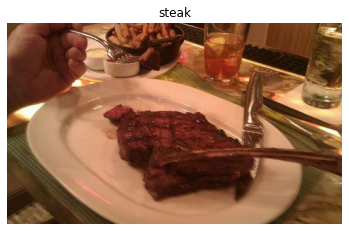

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[ 88,  54,  27],
        [ 91,  57,  30],
        [ 96,  62,  34],
        ...,
        [107,  66,  20],
        [118,  78,  27],
        [131,  91,  39]],

       [[ 93,  59,  32],
        [ 94,  60,  32],
        [ 94,  60,  32],
        ...,
        [109,  71,  24],
        [125,  88,  36],
        [131,  94,  41]],

       [[ 95,  61,  33],
        [ 95,  61,  33],
        [ 94,  60,  32],
        ...,
        [121,  88,  37],
        [135, 102,  49],
        [137, 104,  51]],

       ...,

       [[123,  89,  61],
        [134, 100,  72],
        [145, 112,  81],
        ...,
        [120,  83,  41],
        [115,  80,  38],
        [119,  86,  43]],

       [[106,  72,  44],
        [119,  85,  57],
        [133, 100,  69],
        ...,
        [121,  84,  42],
        [114,  79,  37],
        [118,  85,  42]],

       [[ 92,  58,  30],
        [105,  71,  43],
        [122,  89,  58],
        ...,
        [122,  85,  43],
        [114,  79,  37],
        [115,  82,  39]]

In [11]:
# View the image shape
img.shape # returns (width, height, colour channels)

(307, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.34509804, 0.21176471, 0.10588235],
        [0.35686275, 0.22352941, 0.11764706],
        [0.37647059, 0.24313725, 0.13333333],
        ...,
        [0.41960784, 0.25882353, 0.07843137],
        [0.4627451 , 0.30588235, 0.10588235],
        [0.51372549, 0.35686275, 0.15294118]],

       [[0.36470588, 0.23137255, 0.1254902 ],
        [0.36862745, 0.23529412, 0.1254902 ],
        [0.36862745, 0.23529412, 0.1254902 ],
        ...,
        [0.42745098, 0.27843137, 0.09411765],
        [0.49019608, 0.34509804, 0.14117647],
        [0.51372549, 0.36862745, 0.16078431]],

       [[0.37254902, 0.23921569, 0.12941176],
        [0.37254902, 0.23921569, 0.12941176],
        [0.36862745, 0.23529412, 0.1254902 ],
        ...,
        [0.4745098 , 0.34509804, 0.14509804],
        [0.52941176, 0.4       , 0.19215686],
        [0.5372549 , 0.40784314, 0.2       ]],

       ...,

       [[0.48235294, 0.34901961, 0.23921569],
        [0.5254902 , 0.39215686, 0.28235294],
        [0.56862745, 0

### An end-to-end example

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocessing data (normalizing it)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42) 

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)),
  
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 211ms/step - loss: 0.5547 - accuracy: 0.7207 - val_loss: 0.3919 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4320 - accuracy: 0.8047 - val_loss: 0.3345 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3970 - accuracy: 0.8320 - val_loss: 0.3120 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3608 - accuracy: 0.8487 - val_loss: 0.3262 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3216 - accuracy: 0.8707 - val_loss: 0.3484 - val_accuracy: 0.8480


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

In [14]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Using the same model as before

In [15]:
tf.random.set_seed(42)

model_prev_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_prev_1.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

history_prev_1 = model_prev_1.fit(train_data, epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 1.5680 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000


**Only 50% accuracy... bad**

In [16]:
# Let's check the model's architecture
model_prev_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


**model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2**

**Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

In [17]:
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_prev_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_prev_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
prev_history_2 = model_prev_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 4.5561 - accuracy: 0.6327 - val_loss: 1.5317 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 1.1804 - accuracy: 0.6800 - val_loss: 0.5273 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6903 - accuracy: 0.7147 - val_loss: 0.4609 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5164 - accuracy: 0.7587 - val_loss: 0.6399 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5150 - accuracy: 0.7620 - val_loss: 0.4845 - val_accuracy: 0.7600


In [18]:
# Check out the summary
model_prev_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

### Binary classification

### 1. Import and become one with the data

In [19]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

# WE'VE ALREADY DOWNLOADED IT, SO I JUST COMMENT IT

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


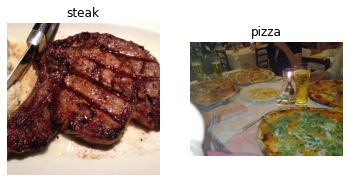

In [20]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [21]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

In [23]:
# Turn it  into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Some things to here:

Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
The target_size parameter defines the input size of our images in (height, width) format.
The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

In [24]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [25]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with a baseline)

In [27]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
baseline_model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation="relu",
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
filters - these are the number of "feature extractors" that will be moving over our images.
kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [29]:
# Compile the model
baseline_model_1.compile(loss='binary_crossentropy',
                         optimizer=Adam(),
                         metrics=['accuracy'])

Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'.

### 4. Fit a model

You'll notice two new parameters here:

steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [30]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [31]:
# Fit the model
baseline_history_1 = baseline_model_1.fit(train_data,
                                          epochs=5,
                                          steps_per_epoch=len(train_data),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 1.6892 - accuracy: 0.6240 - val_loss: 0.4959 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4500 - accuracy: 0.7933 - val_loss: 0.3956 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3368 - accuracy: 0.8580 - val_loss: 0.3869 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.1935 - accuracy: 0.9353 - val_loss: 0.4378 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.0867 - accuracy: 0.9727 - val_loss: 0.4805 - val_accuracy: 0.8300


### 5. Evaluate the model

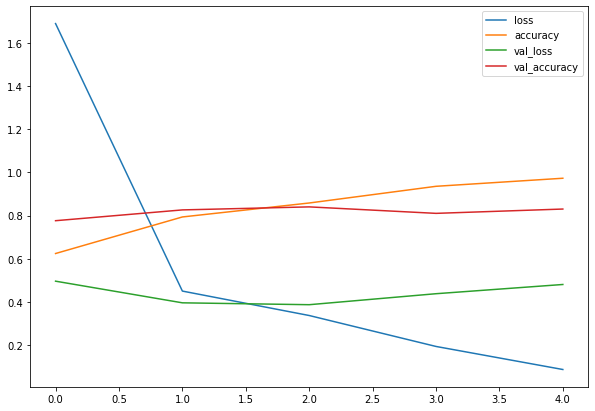

In [32]:
# Plot the training curves
import pandas as pd
pd.DataFrame(baseline_history_1.history).plot(figsize=(10, 7));

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [33]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

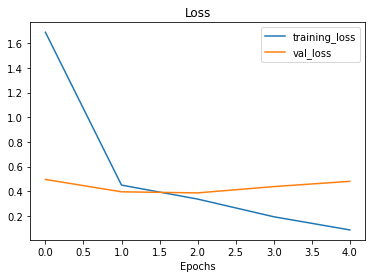

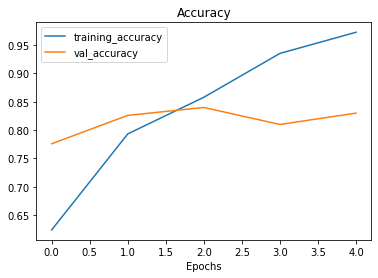

In [34]:
# Check out the loss curves of baseline_model_1
plot_loss_curves(baseline_history_1)

In [35]:
# Check out our model's architecture
baseline_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

* Create a basline.
* Beat the baseline by overfitting a larger model.
* Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.
* But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

A ConvNet with max pooling
A ConvNet with max pooling and data augmentation
For the first model, we'll follow the modified basic CNN structure:

* Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.

In [36]:
# Create the model (this can be our baseline, a 3 layer CNN)
baseline_model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [37]:
# Compile the model
baseline_model_2.compile(loss='binary_crossentropy',
                         optimizer=Adam(),
                         metrics=["accuracy"])

In [38]:
# Fit the model
baseline_history_2 = baseline_model_2.fit(train_data,
                                          epochs=5,
                                          steps_per_epoch=len(train_data),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.6230 - accuracy: 0.6300 - val_loss: 0.4371 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4524 - accuracy: 0.7967 - val_loss: 0.3681 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4182 - accuracy: 0.8200 - val_loss: 0.3674 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3934 - accuracy: 0.8247 - val_loss: 0.3596 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3611 - accuracy: 0.8427 - val_loss: 0.3014 - val_accuracy: 0.8760


In [39]:
# Check out the model architecture
baseline_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves

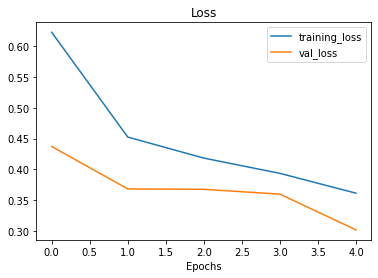

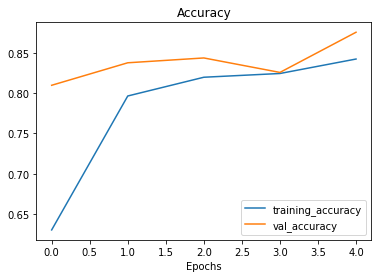

In [40]:
# Plot loss curves of baseline_model_2 results
plot_loss_curves(baseline_history_2)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

In [41]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [42]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstration purposes

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [43]:
# Get the data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels aren't augmented, they stay the same

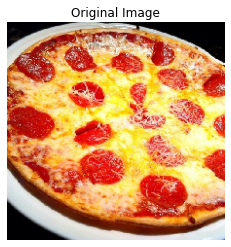

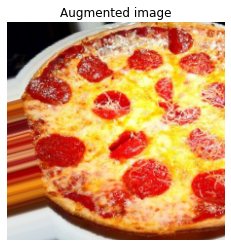

In [44]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've got augmented data, let's try and refit a model on it and see how it affects training

In [47]:
# Create the model
augmented_model_1 = Sequential([
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2), # reduce numb of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile it
augmented_model_1.compile(loss='binary_crossentropy',
                          optimizer=Adam(),
                          metrics=["accuracy"])

# Fit it
augmented_history_1 = augmented_model_1.fit(train_data_augmented,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_augmented),
                                            validation_data=test_data,
                                            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 490ms/step - loss: 0.7045 - accuracy: 0.6167 - val_loss: 0.7061 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.7043 - accuracy: 0.4773 - val_loss: 0.6855 - val_accuracy: 0.6140
Epoch 3/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6912 - accuracy: 0.5500 - val_loss: 0.6775 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.7352 - accuracy: 0.5533 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6940 - accuracy: 0.5100 - val_loss: 0.6804 - val_accuracy: 0.5120


Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

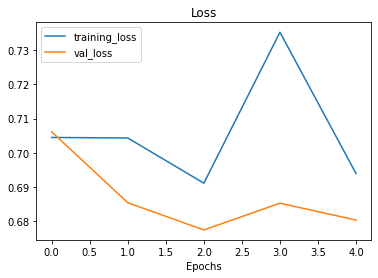

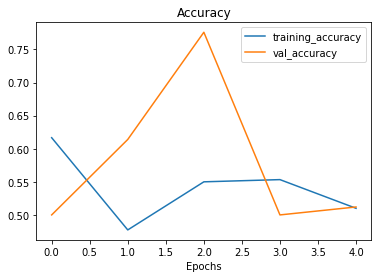

In [48]:
# Check model's performance history training on augmented data
plot_loss_curves(augmented_history_1)

Let's see what happens when we shuffle the augmented training data.

In [49]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [51]:
# Create the model 
augmented_model_shuffled_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

augmented_model_1.compile(loss='binary_crossentropy',
                          optimizer=Adam(),
                          metrics=['accuracy'])

augmented_history_2 = augmented_model_1.fit(train_data_augmented_shuffled,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_augmented_shuffled),
                                            validation_data=test_data,
                                            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6540 - accuracy: 0.5847 - val_loss: 0.5555 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5617 - accuracy: 0.7080 - val_loss: 0.3873 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.4854 - accuracy: 0.7787 - val_loss: 0.3411 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4554 - accuracy: 0.7953 - val_loss: 0.4132 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4668 - accuracy: 0.7847 - val_loss: 0.3251 - val_accuracy: 0.8600


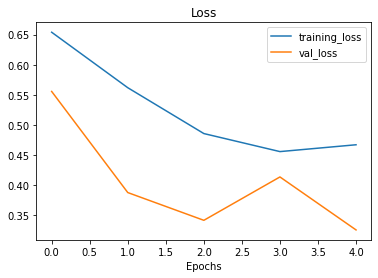

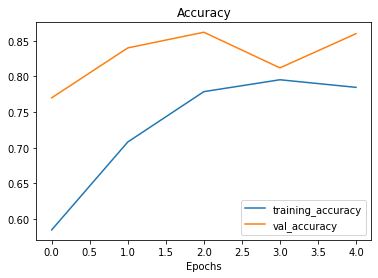

In [52]:
# Check model's performance
plot_loss_curves(augmented_history_2)

With shuffle method we slightly increased our results!

### 7. Repeat until satisified

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
* Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

In [55]:
# Create a CNN model (same as Tiny VGG but for binary classification
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented_shuffled,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented_shuffled),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 497ms/step - loss: 0.6216 - accuracy: 0.6493 - val_loss: 0.4897 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5323 - accuracy: 0.7293 - val_loss: 0.3890 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5165 - accuracy: 0.7507 - val_loss: 0.3936 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5121 - accuracy: 0.7527 - val_loss: 0.4129 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4870 - accuracy: 0.7667 - val_loss: 0.3872 - val_accuracy: 0.8440


In [56]:
# Check model_1 architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [57]:
# Check model_10 architecture
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

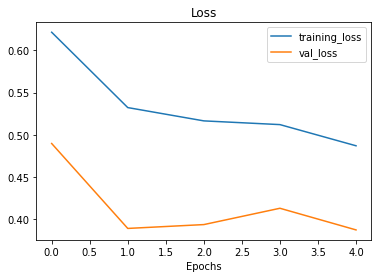

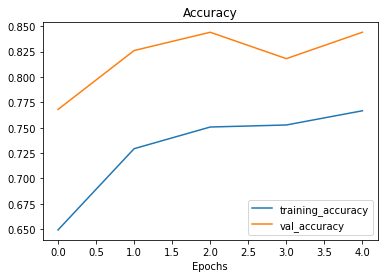

In [58]:
# Now let's check out our TinyVGG model's performance
plot_loss_curves(history_10)

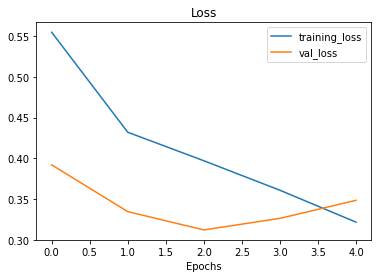

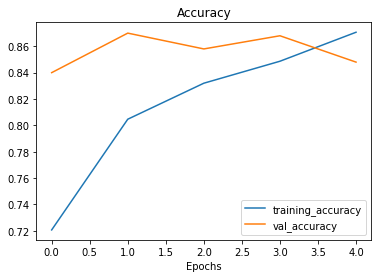

In [59]:
# Now let's look at model_1 performance
plot_loss_curves(history_1)

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

### Making a prediction with our trained model

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [60]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-01-22 08:44:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-01-22 08:44:39 (51.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



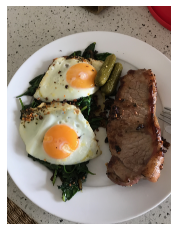

In [61]:
# View our example image (random, from internet)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [63]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

In [64]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # Our model is trained on images with 3 colour channels and sometimes images 4 colour channels
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (one-hot encode)
  img = img/255.
  return img

Now we've got a function to load our custom image, let's load it in.

In [65]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Wonderful, our image is in tensor format, time to try it with our model!

In [66]:
# Make a prediction on our custom image (spoiler: this won't work)
model_10.predict(steak)

ValueError: ignored

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

In [67]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

Our custom image has a batch size of 1! Let's make a prediction on it.

In [68]:
# Make a prediction on custom image tensor
pred = model_10.predict(steak)
pred

array([[0.67672515]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [69]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [72]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [73]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

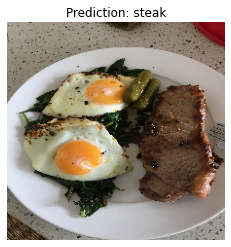

In [74]:
# Test our model on a custom image
pred_and_plot(model_10, "03-steak.jpeg", class_names)

Lets try another image

--2022-01-22 09:11:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-01-22 09:11:13 (55.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



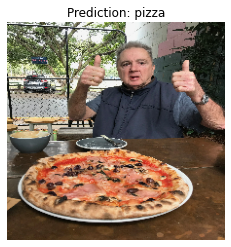

In [78]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

Two thumbs up! Woohoo!

### Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied

### 1. Import and become one with the data


Again, we've got a subset of the Food101 dataset. In addition to the pizza and steak images, we've pulled out another eight classes.

In [79]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-22 09:19:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   178MB/s    in 2.8s    

2022-01-22 09:19:24 (178 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the 10_food_classes file.

In [80]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

We'll now setup the training and test directory paths.

In [81]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [82]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


How about we visualize an image from the training set?



Image shape: (382, 512, 3)


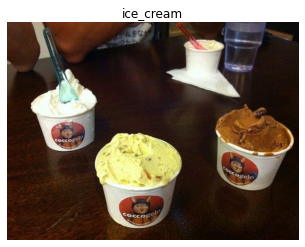

In [84]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly.

Time to preprocess the data

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.

### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:

* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
* Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create our model (a clone of model_10, except to be multi-class)
multi_model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
multi_model_1.compile(loss='categorical_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

### 4. Fit a model

Now we've got a model suited for working with multiple classes, let's fit it to our data.

In [90]:
# Fit the model
multi_history_1 = multi_model_1.fit(train_data,
                                    epochs=5,
                                    steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 201ms/step - loss: 2.2572 - accuracy: 0.1497 - val_loss: 2.0990 - val_accuracy: 0.2280
Epoch 2/5
235/235 [==============================] - 47s 198ms/step - loss: 2.0021 - accuracy: 0.2916 - val_loss: 1.9984 - val_accuracy: 0.2932
Epoch 3/5
235/235 [==============================] - 47s 198ms/step - loss: 1.6546 - accuracy: 0.4369 - val_loss: 2.0670 - val_accuracy: 0.2844
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 0.9929 - accuracy: 0.6721 - val_loss: 2.4655 - val_accuracy: 0.2712
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.3707 - accuracy: 0.8875 - val_loss: 3.6887 - val_accuracy: 0.2408


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

### 5. Evaluate the model

We've just trained a model on 10 different classes of food images, let's see how it went.

In [92]:
# Evaluate on the test data
multi_model_1.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 3.6887 - accuracy: 0.2408


[3.6886532306671143, 0.24079999327659607]

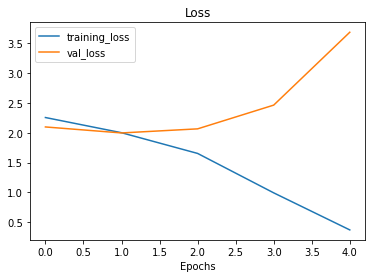

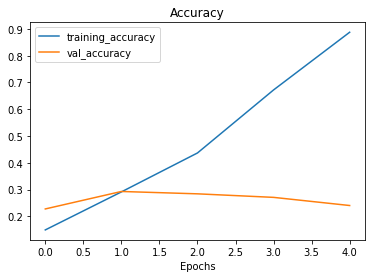

In [93]:
# Check out the model's loss curves on the 10 classes of data
plot_loss_curves(multi_history_1)

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model parameters

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

* Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data.
* One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
🔑 Note: Preventing overfitting is also referred to as regularization.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [94]:
# Try a simplified model (removed 2 layers)
multi_model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

multi_model_2.compile(loss='categorical_crossentropy',
                      optimizer=Adam(),
                      metrics=["accuracy"])

multi_history_2 = multi_model_2.fit(train_data,
                                    epochs=5,
                                    steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.1226 - accuracy: 0.2481 - val_loss: 1.9617 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.7961 - accuracy: 0.3969 - val_loss: 1.8858 - val_accuracy: 0.3380
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.4918 - accuracy: 0.5083 - val_loss: 2.0314 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 1.1073 - accuracy: 0.6459 - val_loss: 2.1427 - val_accuracy: 0.3244
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.6888 - accuracy: 0.7895 - val_loss: 2.6973 - val_accuracy: 0.2768


In [95]:
# Evalute our model
multi_model_2.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 2.6973 - accuracy: 0.2768


[2.6973464488983154, 0.2768000066280365]

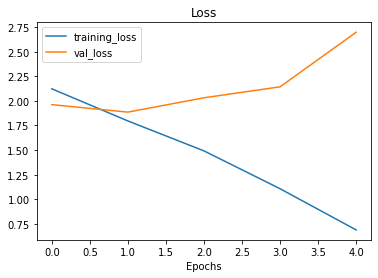

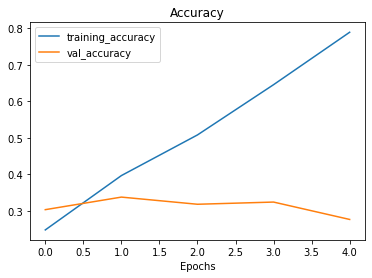

In [96]:
# Check out the loss curves of multi_model_2
plot_loss_curves(multi_history_2)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about data augmentation?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

In [104]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [176]:
multi_model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

multi_model_3.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.00043),
                      metrics=["accuracy"])

multi_history_3 = multi_model_3.fit(train_data_augmented,
                                    epochs=8,
                                    steps_per_epoch=len(train_data_augmented),
                                    validation_data=test_data,
                                    validation_steps=len(test_data))

Epoch 1/8
235/235 [==============================] - 112s 476ms/step - loss: 2.1949 - accuracy: 0.1940 - val_loss: 2.0242 - val_accuracy: 0.2844
Epoch 2/8
235/235 [==============================] - 111s 473ms/step - loss: 2.0557 - accuracy: 0.2771 - val_loss: 1.8878 - val_accuracy: 0.3404
Epoch 3/8
235/235 [==============================] - 111s 473ms/step - loss: 2.0066 - accuracy: 0.3001 - val_loss: 1.8597 - val_accuracy: 0.3696
Epoch 4/8
235/235 [==============================] - 111s 470ms/step - loss: 1.9772 - accuracy: 0.3132 - val_loss: 1.8051 - val_accuracy: 0.3772
Epoch 5/8
235/235 [==============================] - 109s 464ms/step - loss: 1.9521 - accuracy: 0.3304 - val_loss: 1.8075 - val_accuracy: 0.3832
Epoch 6/8
235/235 [==============================] - 108s 461ms/step - loss: 1.9390 - accuracy: 0.3331 - val_loss: 1.8140 - val_accuracy: 0.3772
Epoch 7/8
235/235 [==============================] - 110s 467ms/step - loss: 1.9196 - accuracy: 0.3353 - val_loss: 1.7739 - val_ac

In [177]:
multi_model_3.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.7897 - accuracy: 0.3932


[1.7897223234176636, 0.39320001006126404]

In [149]:
4e-4

0.0004

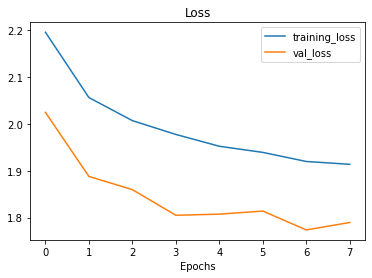

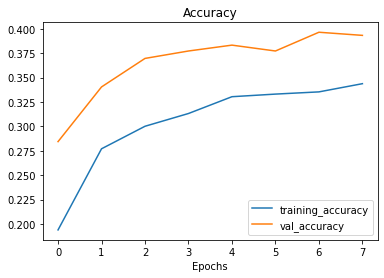

In [178]:
# Check out our model's performance with augmented data
plot_loss_curves(multi_history_3)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

### 7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning**.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

### Making a prediction with our trained model

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [127]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Beautiful, now let's get some of our custom images.

In [110]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Okay, we've got some custom images to try, let's use the pred_and_plot function to make a prediction with multi_model_3 on one of the images and plot it.

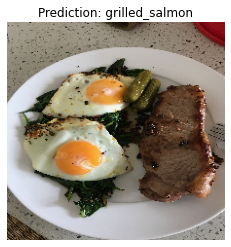

In [179]:
# Make a prediction using multi_model_3
pred_and_plot(model=multi_model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

Hmm... it looks like our model got the prediction wrong, how about we try another?

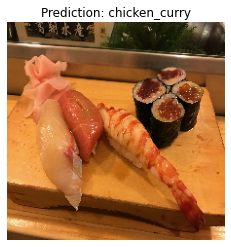

In [180]:
pred_and_plot(multi_model_3, "03-sushi.jpeg", class_names)

And again, it's predicting chicken_curry for some reason.

How about one more?

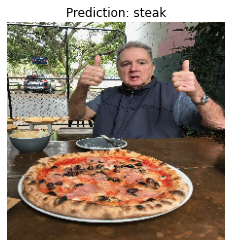

In [181]:
pred_and_plot(multi_model_3, "03-pizza-dad.jpeg", class_names)

chicken_curry again? There must be something wrong...

I think it might have to do with our pred_and_plot function.

Let's makes a prediction without using the function and see where it might be going wrong.

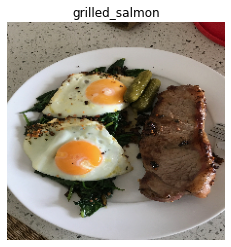

In [187]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = multi_model_3.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

INCORRECT...

There must be something up with our pred_and_plot function.

And I think I know what it is.

The pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the predict function.

In [133]:
# Check the output of the predict function
pred = multi_model_3.predict(tf.expand_dims(img, axis=0))
pred

array([[0.02218045, 0.01080218, 0.01360742, 0.43649882, 0.05785585,
        0.0030327 , 0.00374783, 0.14806333, 0.29695466, 0.00725672]],
      dtype=float32)

Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.

In [134]:
# Find the predicted class name
class_names[pred.argmax()]

'grilled_salmon'

Knowing this, we can readjust our pred_and_plot function to work with multiple classes as well as binary classes.

In [135]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Let's try it out. If we've done it right, using different images should lead to different outputs (rather than chicken_curry every time).

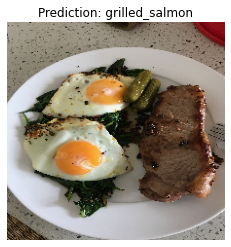

In [183]:
pred_and_plot(multi_model_3, "03-steak.jpeg", class_names)

INCORRECT...

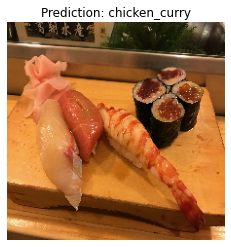

In [184]:
pred_and_plot(multi_model_3, "03-sushi.jpeg", class_names)

INCORRECT...

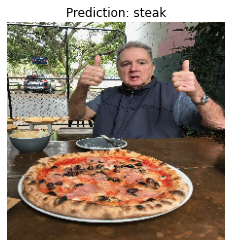

In [185]:
pred_and_plot(multi_model_3, "03-pizza-dad.jpeg", class_names)

EWWW, THAT WASN'T CORRECT...

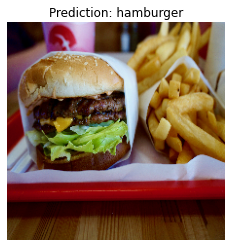

In [186]:
pred_and_plot(multi_model_3, "03-hamburger.jpeg", class_names)

CORRECT!!!

### Saving and loading our model

In [189]:
# Save a model
multi_model_3.save("multi_model_prediction")

INFO:tensorflow:Assets written to: multi_model_prediction/assets


In [190]:
# Load in a model and evaluate it
loaded_multi_model_3 = tf.keras.models.load_model("multi_model_prediction")
loaded_multi_model_3.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.7897 - accuracy: 0.3932


[1.7897220849990845, 0.39320001006126404]

In [191]:
# Compare our unsaved model's results (same as above)
multi_model_3.evaluate(test_data) 

79/79 [==============================] - 11s 134ms/step - loss: 1.7897 - accuracy: 0.3932


[1.7897220849990845, 0.39320001006126404]